In [122]:
import numpy as np
import pandas as pd
from sklearn import preprocessing  # https://blog.csdn.net/cheng9981/article/details/61650879
import matplotlib.pyplot as plt
%matplotlib inline

from tool import *

In [64]:
dataset_raw = pd.read_csv("adultTest.csv")
dataset_raw = clear_space(dataset_raw)

In [65]:
# birdview(dataset_raw)
# catview(dataset_raw)
valueview(dataset_raw.loc[:,['education-num']])

---定值数据概况---


,count,mean,std,min,25%,50%,75%,max,skew,kurt,type,isnull
education-num,32561.0,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0,-0.311676,0.623444,int64,0


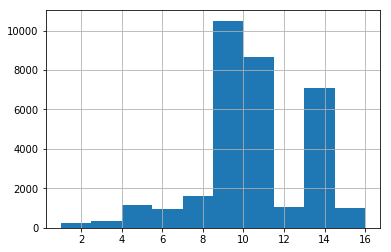

In [66]:
dataset_raw['education-num'].hist()

# 标准化

## StandardScaler

In [112]:
"""
StandardScaler() 的参数with_mean 默认为True 表示使用密集矩阵，使用稀疏矩阵则会报错 ，with_mean= False 适用于稀疏矩阵
with_std 默认为True 如果为True，则将数据缩放为单位方差（单位标准偏差）
copy 默认为True 如果为False，避免产生一个副本，并执行inplace缩放。 如果数据不是NumPy数组或scipy.sparse CSR矩阵，则仍可能返回副本
"""
ss = preprocessing.StandardScaler()
ss_transform = ss.fit_transform(dataset_raw.loc[:,['education-num']])
print(ss.scale_)
print(ss.var_)
print(ss.mean_)
print(ss.n_samples_seen_)

[2.57268083]
[6.61868663]
[10.08067934]
32561


In [114]:
pd.DataFrame(ss_transform).describe().T

,count,mean,std,min,25%,50%,75%,max
0,32561.0,1.471887e-16,1.000015,-3.529656,-0.42006,-0.03136,0.746039,2.300838


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115a7d828>]],
      dtype=object)

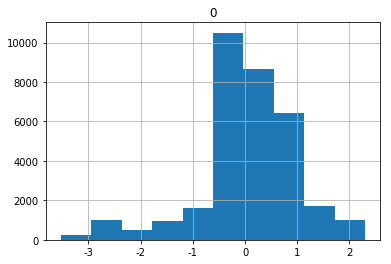

In [70]:
pd.DataFrame(ss_transform).hist()

## MinMaxScaler

In [101]:
ms = preprocessing.MinMaxScaler(feature_range=(0,1))  # 默认缩放到区间 [0, 1]
ms_transform = ms.fit_transform(dataset_raw.loc[:,['education-num']])

In [102]:
print(ms.scale_)
print(ms.min_)
print(ms.data_min_)
print(ms.data_max_)
print(ms.data_range_)

[0.06666667]
[-0.06666667]
[1.]
[16.]
[15.]


In [103]:
pd.DataFrame(ms_transform).describe().T

,count,mean,std,min,25%,50%,75%,max
0,32561.0,0.605379,0.171515,0.0,0.533333,0.6,0.733333,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122394438>]],
      dtype=object)

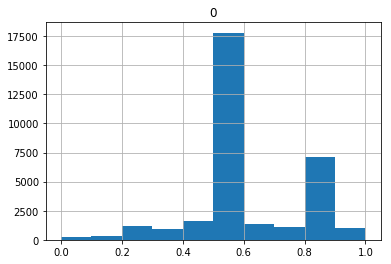

In [104]:
pd.DataFrame(ms_transform).hist()

## MaxAbsScaler
MaxAbsScaler和maxabs_scale是专门为缩放稀疏数据而设计的。

In [87]:
mas = preprocessing.MaxAbsScaler()
mas_transform = mas.fit_transform(dataset_raw.loc[:,['education-num']])

In [96]:
print(mas.scale_)
print(mas.max_abs_)
print(mas.n_samples_seen_)

[16.]
[16.]
32561


In [88]:
pd.DataFrame(mas_transform).describe().T

,count,mean,std,min,25%,50%,75%,max
0,32561.0,0.630042,0.160795,0.0625,0.5625,0.625,0.75,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1208adac8>]],
      dtype=object)

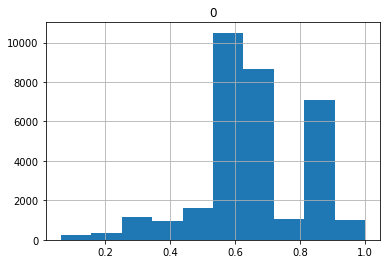

In [89]:
pd.DataFrame(mas_transform).hist()

## RobustScaler
如果你的数据包含许多异常值，使用均值和方差缩放可能并不是一个很好的选择。这种情况下，你可以使用 robust_scale 以及 RobustScaler 作为替代品。它们对你的数据的中心和范围使用更有鲁棒性的估计。
但不能适应稀疏输入。

In [105]:
rs = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
rs_transform = mas.fit_transform(dataset_raw.loc[:,['education-num']])

In [108]:
pd.DataFrame(rs_transform).describe().T

,count,mean,std,min,25%,50%,75%,max
0,32561.0,0.630042,0.160795,0.0625,0.5625,0.625,0.75,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122548080>]],
      dtype=object)

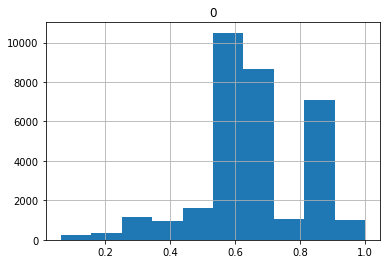

In [109]:
pd.DataFrame(rs_transform).hist()

## 关于稀疏矩阵
MaxAbsScaler和maxabs_scale是专门为缩放稀疏数据而设计的。scale和StandardScaler可以接受scipy.sparse矩阵作为输入，只要将with_mean = False显式传递给构造函数即可。否则，将抛出ValueError，因为静默中心将打破稀疏性，并且通常会由于无意分配过多的内存而导致执行崩溃。RobustScaler不能适用于稀疏输入，但是您可以对稀疏输入使用变换方法。
请注意，缩放器接受压缩的稀疏行和压缩的稀疏列的格式（请参阅scipy.sparse.csr_matrix和scipy.sparse.csc_matrix）。任何其他稀疏输入将被转换为压缩稀疏行表示。为了避免不必要的内存复制，建议选择CSR或CSC表示。最后，如果中心数据预期足够小，使用稀疏矩阵的toarray方法将输入显式转换为数组是另一个好的选择。

# 归一化
归一化是 **缩放单个样本** 以具有单位范数 的过程。

In [120]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

NL = preprocessing.Normalizer()
NL.fit_transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

# 二值化

In [119]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

# 可以调整二值化器的阈值
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

# 类别编码

## OneHotEncoder

## LabelEncoder

## LabelBinarizer

## MultiLabelBinarizer

# 缺失值的插补
参数：
* missing_values：int 或者“NaN”，对np.nan的值用 "NaN"
* strategy："mean"、"median"、"most_frequent"
属性：
* statistics_：ndarray，当axis==0时，取每列填补时用的值

In [130]:
imp = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit([[1, 2], 
         [np.nan, 3], 
         [7, 6]])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [131]:
print(imp.statistics_)

[4.         3.66666667]


In [132]:
X = [[np.nan, 2], 
     [6, np.nan], 
     [7, 6]]
imp.transform(X)

array([[4.        , 2.        ],
       [6.        , 3.66666667],
       [7.        , 6.        ]])

# 生成多项式特征

In [136]:
X = np.arange(6).reshape(3, 2)
"""
array([[0, 1],
       [2, 3],
       [4, 5]])
"""
poly = preprocessing.PolynomialFeatures(2)
poly.fit_transform(X)          
# 从X(X_1, X_2) 到X(1, X_1, X_2, X_1^2, X_1X_2, X_2^2).

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [137]:
#在某些情况下，只需要特征之间的交互项，并且可以通过设置获得
X = np.arange(9).reshape(3, 3)
"""
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])
"""
poly = preprocessing.PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X)     
# 从(X_1, X_2, X_3) 到 (1, X_1, X_2, X_3, X_1X_2, X_1X_3, X_2X_3, X_1X_2X_3).

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

# 自定义转化器

In [133]:
transformer = preprocessing.FunctionTransformer(np.log1p)
X = np.array([[0, 1], 
              [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

---